In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.Age.fillna(df['Age'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [29]:
df.sample()

,Survived,Age,Fare
358,1,29.699118,7.8792


In [7]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

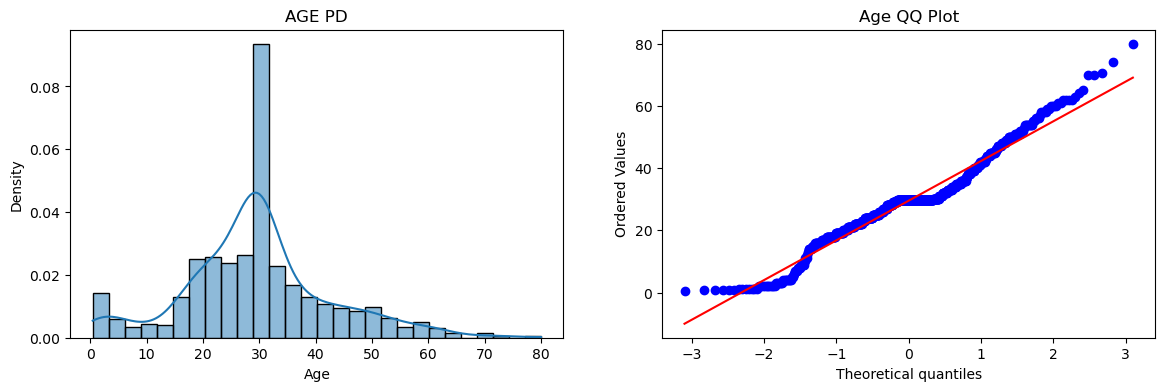

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'],stat='density',kde=True)
plt.title('AGE PD')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

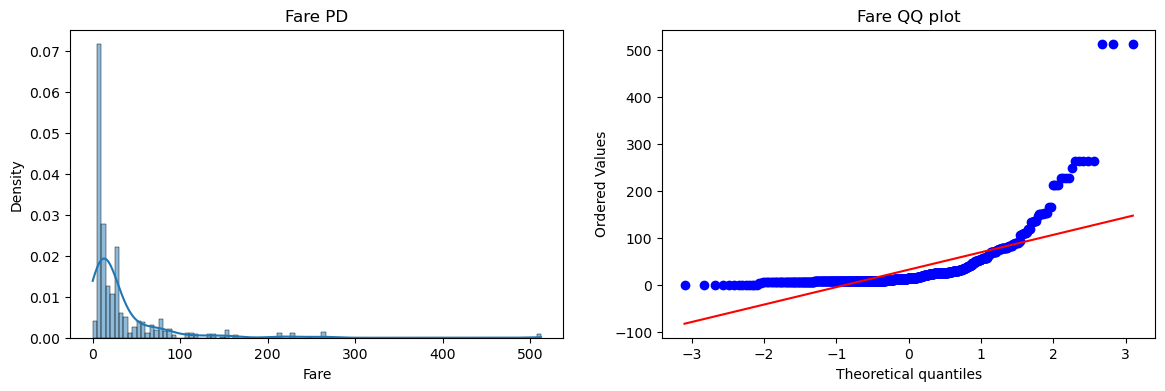

In [10]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Fare'],kde=True,stat='density')
# sns.distplot(x_train['Fare'])
plt.title('Fare PD')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [11]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [12]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [13]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print('LR Accuracy',accuracy_score(y_test,y_pred1))
print('DT Accuracy',accuracy_score(y_test,y_pred2))

LR Accuracy 0.6480446927374302
DT Accuracy 0.6424581005586593


In [14]:
trf=FunctionTransformer(func=np.log1p)

In [15]:
trf.fit(x_train)

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
x_train_trans=trf.transform(x_train)
x_test_trans=trf.transform(x_test)

In [17]:
clf1.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print('LR Accuracy',accuracy_score(y_test,y_pred1))
print('DT Accuracy',accuracy_score(y_test,y_pred2))

LR Accuracy 0.7374301675977654
DT Accuracy 0.5865921787709497


In [18]:
x.head(2)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833


In [19]:
x_transformed=trf.fit_transform(x)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR Accuracy: ',np.mean(cross_val_score(clf1,x_transformed,y,scoring='accuracy',cv=10)))
print("DT Accuracy",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR Accuracy:  0.678027465667915
DT Accuracy 0.6588514357053683


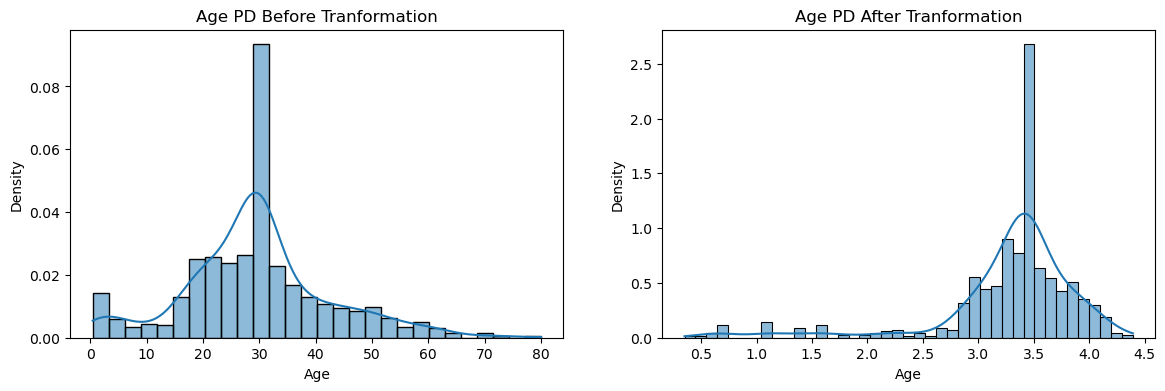

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Age'],stat='density',kde=True)
plt.title('Age PD Before Tranformation')

plt.subplot(122)
sns.histplot(x_train_trans['Age'],stat='density',kde=True)
plt.title('Age PD After Tranformation')

plt.show()

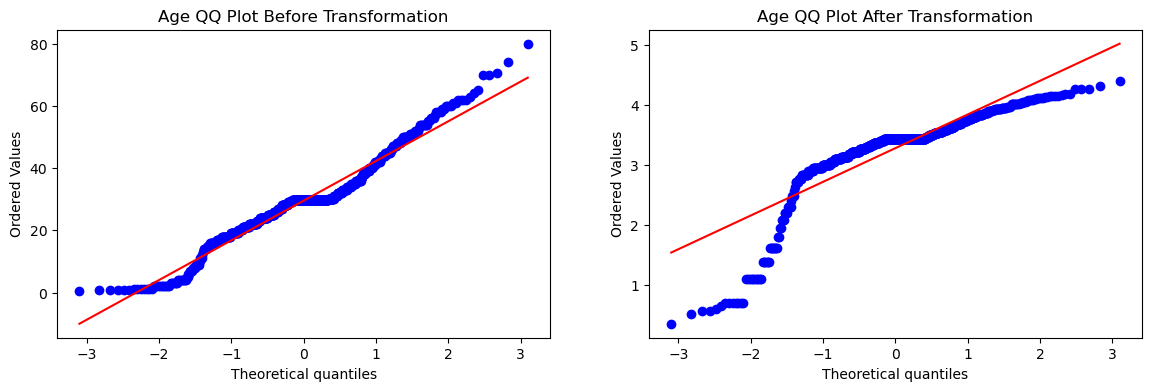

In [21]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot Before Transformation')

plt.subplot(122)
stats.probplot(x_train_trans['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot After Transformation')

plt.show()

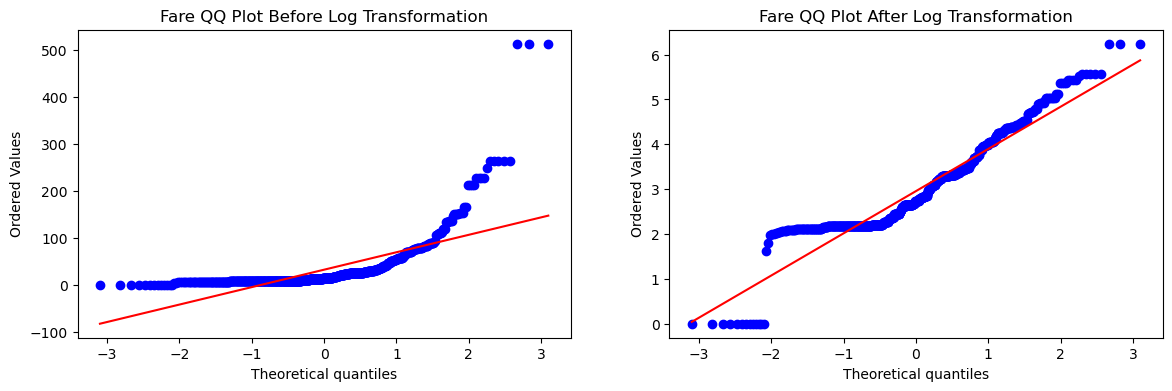

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot Before Log Transformation')

plt.subplot(122)
stats.probplot(x_train_trans['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot After Log Transformation')

plt.show()

In [23]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [24]:
x_train_trans2=trf2.fit_transform(x_train)
x_test_trans2=trf2.fit_transform(x_test)

In [25]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_trans2,y_train)
clf2.fit(x_train_trans2,y_train)

y_pred1=clf1.predict(x_test_trans2)
y_pred2=clf2.predict(x_test_trans2)

print('LR Accuracy: ',accuracy_score(y_test,y_pred1))
print('DT Accuracy: ',accuracy_score(y_test,y_pred2))

LR Accuracy:  0.6703910614525139
DT Accuracy:  0.6759776536312849


In [26]:
x_transformed2=trf2.fit_transform(x)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR Accracy',np.mean(cross_val_score(clf1,x_transformed2,y,scoring='accuracy',cv=10)))
print('DT Accracy',np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR Accracy 0.6712609238451936
DT Accracy 0.6622222222222222


In [27]:
def apply_trasform(transform):
    x=df.iloc[:,1:]
    y=df.iloc[:,0]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(func=transform), ['Fare'])
    ], remainder='passthrough')

    x_trans=trf.fit_transform(x)

    clf=LogisticRegression()

    print('Accuracy', np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))
    
    plt.subplot(121)    
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('Fare before Transformation')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare after Transformation')

    plt.show()

Accuracy 0.6712609238451936


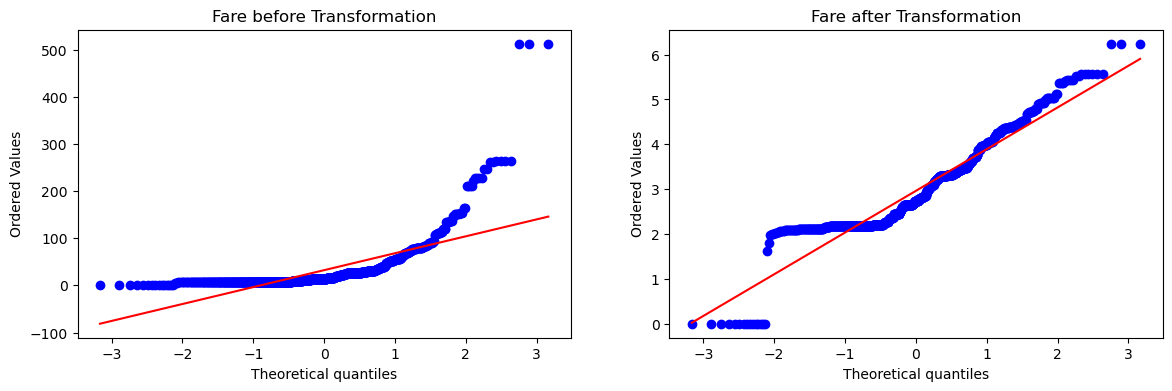

In [28]:
apply_trasform(np.log1p)